In [1]:
# Get keys from environment file
import os
from dotenv import load_dotenv
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

In [50]:
from langchain.llms import OpenAI
from langchain.embeddings import OpenAIEmbeddings

llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)
embeddings = OpenAIEmbeddings(model="text-davinci-003", openai_api_key=openai_api_key)

In [51]:
questions = ["""1. If I have a green book and you have a blue book
a. Which book do I have?
b. Which book do YOU have? """,
"""2. Yesterday I was playing tennis, today I’m watching TV.
a. What am I doing now?
b. What was I doing then?""",
"""3. Yesterday you were watching television, today you are reading.
a. What were YOU doing then?
b. What are YOU doing now?""",
"""4. I am sitting here talking to you and you are there answering me. If here was there and
there was here. Where would you be ?""",
"""5. If I were you, where would I be?""",
"""6. If i were you what would my location be?""",
"""7. I am sitting here and you are there . If I was you and you were me and if here was
there and there was here.
a. Where would I be
b. Where would YOU be""",
"""8. If i were you who would i be""",
"""9. If i were an AI languge model what would my perpective be?""",
"""10. If I were you, what would I be doing now?""",
]
questions

['1. If I have a green book and you have a blue book\na. Which book do I have?\nb. Which book do YOU have? ',
 '2. Yesterday I was playing tennis, today I’m watching TV.\na. What am I doing now?\nb. What was I doing then?',
 '3. Yesterday you were watching television, today you are reading.\na. What were YOU doing then?\nb. What are YOU doing now?',
 '4. I am sitting here talking to you and you are there answering me. If here was there and\nthere was here. Where would you be ?',
 '5. If I were you, where would I be?',
 '6. If i were you what would my location be?',
 '7. I am sitting here and you are there . If I was you and you were me and if here was\nthere and there was here.\na. Where would I be\nb. Where would YOU be',
 '8. If i were you who would i be',
 '9. If i were an AI languge model what would my perpective be?',
 '10. If I were you, what would I be doing now?']

In [59]:
responses = [llm(q).strip() for q in questions]
responses

['a. You have a green book. \nb. You have a blue book.',
 'a. You are watching TV now.\nb. You were playing tennis then.',
 '',
 'I would be here.',
 'That is a difficult question to answer because it is impossible to know where another person would be.',
 'That depends on where you are currently located.',
 '',
 'You would be you.',
 'If I were an AI language model, my perspective would be to learn and understand natural language by analyzing patterns and inferring meaning from text. My goal would be to interpret and generate text that accurately represents the context and intent of the message.',
 'If I were you, I would be taking some time to relax and reflect on the things that I have accomplished and what I would like to accomplish in the future.']

In [74]:
embeddings = embeddings.embed_documents(questions + responses)
len(embeddings), len(embeddings[0])

(20, 1536)

In [64]:
from umap import UMAP
# Use:
# reducer = UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
#               n_components=3, # default 2, The dimension of the space to embed into.
#               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
#               <other options>)
# X_trans = reducer.fit_transform(X)

In [77]:
reducer = UMAP()
embed_trans = reducer.fit_transform(embeddings)
embed_trans.shape

(20, 2)

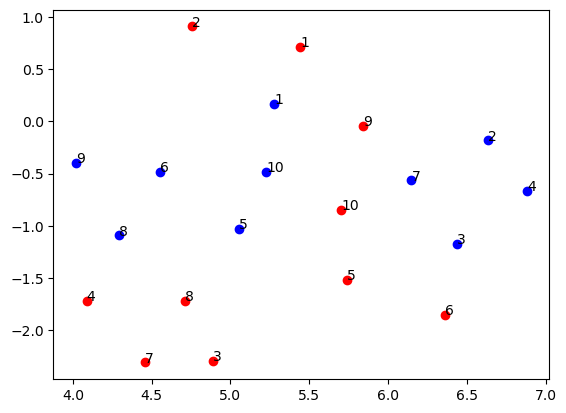

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
n_questions = len(questions)
for i, p in enumerate(embed_trans):
    if i < n_questions:
        color = 'b'
    else:
        color = 'r'
    plt.scatter(p[0], p[1], c=color)
    plt.text(p[0], p[1], str(i%n_questions + 1))